## 1. Импорт библиотек и подгрузка данных

In [285]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-booking/hotels_test.csv
/kaggle/input/sf-booking/hotels_train.csv
/kaggle/input/sf-booking/submission.csv


In [286]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [287]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [288]:
# Подгрузим наши данные из соревнования

DATA_DIR = '/kaggle/input/sf-booking/'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [289]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [290]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [291]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [292]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [293]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [294]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


## 2. Очистка данных

In [295]:
print('В датасете {} дубликатов в тренировочной выборке'.format(df_train[df_train.duplicated()].shape[0]))
df_train.drop_duplicates(inplace=True)
print('Количество строк после удаления дубликатов составляет: {}'.format(df_train.shape[0]))

В датасете 307 дубликатов в тренировочной выборке
Количество строк после удаления дубликатов составляет: 386496


In [296]:
print('В датасете {} дубликатов в тестовой выборке'.format(df_test[df_test.duplicated()].shape[0]))

В датасете 29 дубликатов в тестовой выборке


In [297]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515431 entries, 0 to 515430
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515431 non-null  object 
 1   additional_number_of_scoring                515431 non-null  int64  
 2   review_date                                 515431 non-null  object 
 3   average_score                               515431 non-null  float64
 4   hotel_name                                  515431 non-null  object 
 5   reviewer_nationality                        515431 non-null  object 
 6   negative_review                             515431 non-null  object 
 7   review_total_negative_word_counts           515431 non-null  int64  
 8   total_number_of_reviews                     515431 non-null  int64  
 9   positive_review                             515431 non-null  object 
 

In [299]:
data[(data.lng.isna()) | (data.lat.isna())].shape[0] 

3268

In [300]:
# посмотрим есть ли взаимосвязь между пропусками и отелями:

hotel_adress = data[(data.lng.isna()) & (data.lat.isna())].groupby(by = ['hotel_address','hotel_name']).count().iloc[:,0].reset_index()
hotel_adress

,hotel_address,hotel_name,additional_number_of_scoring
0,20 Rue De La Ga t 14th arr 75014 Paris France,Mercure Paris Gare Montparnasse,37
1,23 Rue Damr mont 18th arr 75018 Paris France,Holiday Inn Paris Montmartre,55
2,4 rue de la P pini re 8th arr 75008 Paris France,Maison Albar Hotel Paris Op ra Diamond,290
3,Bail n 4 6 Eixample 08010 Barcelona Spain,NH Collection Barcelona Podium,146
4,Gr nentorgasse 30 09 Alsergrund 1090 Vienna Au...,City Hotel Deutschmeister,93
5,Hasenauerstra e 12 19 D bling 1190 Vienna Austria,Hotel Park Villa,61
6,Josefst dter Stra e 10 12 08 Josefstadt 1080 V...,Fleming s Selection Hotel Wien City,658
7,Josefst dter Stra e 22 08 Josefstadt 1080 Vien...,Cordial Theaterhotel Wien,57
8,Landstra er G rtel 5 03 Landstra e 1030 Vienna...,Hotel Daniel Vienna,245
9,Paragonstra e 1 11 Simmering 1110 Vienna Austria,Roomz Vienna,49


In [301]:
#создаем таблицу с именами и адресами отелей для заполнения пропусков
data_nan = data[data.isnull().any(axis=1)][['hotel_name']].value_counts().to_frame()
data_nan.drop(0, axis=1, inplace=True)

# добавляем стобец lat с координатами отелей
data_nan.insert(0, 'lat', [
        48.209367,
        48.213593,
        48.220402,
        48.875289,
        48.188793,
        48.216815,
        48.219565,
        48.245944,
        41.391556,
        48.220851,
        48.233513,
        48.209527,
        48.888909,
        48.186854,
        48.839988,
        41.392709,
        41.383306
])

# добавляем стобец lng с координатами отелей
data_nan.insert(1, 'lng', [
        16.353443,
        16.379880,
        16.355824,
        2.323391,
        16.383790,
        16.359906,
        16.285594,
        16.341843,
        2.177926,
        16.366611,
        16.345645,
        16.351484,
        2.333174,
        16.420715,
        2.323604,
        2.167428,
        2.162869
])

In [302]:
# соединяем таблицы по имени отеля, заполнем пропуски и удаляем присоединенные столбцы
data = data.merge(data_nan, how='left', on='hotel_name', suffixes=(None, '_x'))
data.loc[data.lat.isna(), ['lat']] = data[data.lat.isna()]['lat_x']
data.loc[data.lng.isna(), ['lng']] = data[data.lng.isna()]['lng_x']
data.drop(['lat_x', 'lng_x'], axis=1, inplace=True)

data.isnull().sum()

hotel_address                                 0
additional_number_of_scoring                  0
review_date                                   0
average_score                                 0
hotel_name                                    0
reviewer_nationality                          0
negative_review                               0
review_total_negative_word_counts             0
total_number_of_reviews                       0
positive_review                               0
review_total_positive_word_counts             0
total_number_of_reviews_reviewer_has_given    0
tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
sample                                        0
reviewer_score                                0
dtype: int64

Вывод:
Мы проверили данные на наличие пропусков и дубликатов, пропуски были в геоданных,которые мы заполнили.

# 3. Исследование данных

In [303]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515431 entries, 0 to 515430
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515431 non-null  object 
 1   additional_number_of_scoring                515431 non-null  int64  
 2   review_date                                 515431 non-null  object 
 3   average_score                               515431 non-null  float64
 4   hotel_name                                  515431 non-null  object 
 5   reviewer_nationality                        515431 non-null  object 
 6   negative_review                             515431 non-null  object 
 7   review_total_negative_word_counts           515431 non-null  int64  
 8   total_number_of_reviews                     515431 non-null  int64  
 9   positive_review                             515431 non-null  object 
 

In [304]:
data.describe(include = 'all')

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng,sample,reviewer_score
count,515431,515431.000000,515431,515431.000000,515431,515431,515431,515431.000000,515431.000000,515431,515431.000000,515431.000000,515431,515431,515431.000000,515431.000000,515431.00000,515431.000000
unique,1493,NaN,731,NaN,1492,227,330011,NaN,NaN,412601,NaN,NaN,55242,731,NaN,NaN,NaN,NaN
top,163 Marsh Wall Docklands Tower Hamlets London ...,NaN,8/2/2017,NaN,Britannia International Hotel Canary Wharf,United Kingdom,No Negative,NaN,NaN,No Positive,NaN,NaN,"[' Leisure trip ', ' Couple ', ' Double Room '...",1 days,NaN,NaN,NaN,NaN
freq,4789,NaN,2584,NaN,4789,245165,127816,NaN,NaN,35924,NaN,NaN,5101,2584,NaN,NaN,NaN,NaN
mean,NaN,498.275079,NaN,8.397630,NaN,NaN,NaN,18.539760,2744.259084,NaN,17.777342,7.165215,NaN,NaN,49.432745,2.893773,0.74985,6.296715
std,NaN,500.618961,NaN,0.548033,NaN,NaN,NaN,29.690973,2317.823718,NaN,21.803204,11.038742,NaN,NaN,3.461232,4.668796,0.43310,3.902967
min,NaN,1.000000,NaN,5.200000,NaN,NaN,NaN,0.000000,43.000000,NaN,0.000000,1.000000,NaN,NaN,41.328376,-0.369758,0.00000,0.000000
25%,NaN,169.000000,NaN,8.100000,NaN,NaN,NaN,2.000000,1161.000000,NaN,5.000000,1.000000,NaN,NaN,48.214066,-0.143372,0.00000,0.000000
50%,NaN,342.000000,NaN,8.400000,NaN,NaN,NaN,9.000000,2134.000000,NaN,11.000000,3.000000,NaN,NaN,51.499981,0.019886,1.00000,7.900000
75%,NaN,660.000000,NaN,8.800000,NaN,NaN,NaN,23.000000,3633.000000,NaN,22.000000,8.000000,NaN,NaN,51.516288,4.841163,1.00000,9.600000


In [305]:
num_columns = [s for s in data.columns if data[s].dtypes != 'object']
len(num_columns)

10

In [306]:
sns.set (font_scale= 0.7 )

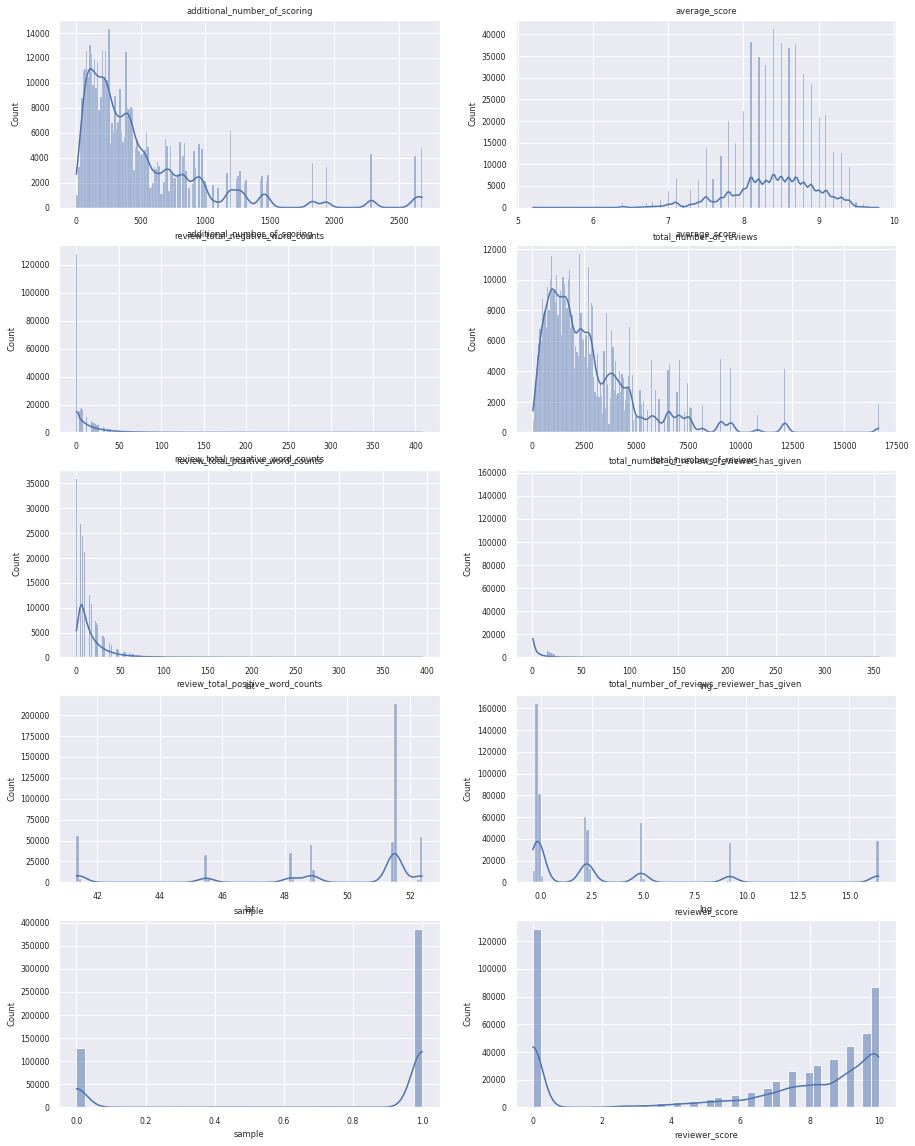

In [307]:
#Посмотрим распределение данных в числовых колонках кроме последней - там булевые значения, что мы сами сделали
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
j = 0
for i in range(5):
    for k in range(2):
        axes[i][k] = sns.histplot(data[num_columns[j]], kde=True, ax=axes[i][k])
        axes[i][k].set_title(num_columns[j])
        j += 1
plt.show()

Пройдемся по всем признакам по порядк, оценим их содержимое и выдвинем гипотезы:
# hotel_address - адрес отеля

In [308]:
data['hotel_address'].apply(lambda x: str(x.split()[-2:])).value_counts()

['United', 'Kingdom']           262300
['Barcelona', 'Spain']           60149
['Paris', 'France']              59626
['Amsterdam', 'Netherlands']     57212
['Vienna', 'Austria']            38938
['Milan', 'Italy']               37206
Name: hotel_address, dtype: int64

Признак уже изучили в рамках поиска геоданных, выделим страны, т.к. всего 6 стран и городов используется в адресе. Может быть посмотрим на индекс

# additional_number_of_scoring - есть также некоторые гости, которые просто поставили оценку сервису, а не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.

In [309]:
# проверим как это выглядит на определеннм отеле:
data[data['hotel_name'] == 'Hotel Da Vinci']['additional_number_of_scoring']

0         904
127       904
506       904
567       904
592       904
         ... 
513950    904
514768    904
515163    904
515263    904
515369    904
Name: additional_number_of_scoring, Length: 1876, dtype: int64

Оценки соотносятся с наименованием отеля и скорее всего, если мы закодируем наименование, то этот признак будет не информативным, но в любом случае его проверим на связь с результатом

# review_date - дата, когда рецензент разместил соответствующий отзыв.

In [310]:
# сразу же переведем признак в дату
data['review_date'] = pd.to_datetime(data['review_date']).dt.date

In [311]:
# проверим оценку от сезоности
data['review_month'] = pd.to_datetime(data['review_date']).dt.month
data['review_quarter'] = pd.to_datetime(data['review_date']).dt.quarter

Предполагаю, что будет полезно выделить в дальнейшем год оценки и месяц(возможно выделить сезон). Хотя судя по распределению, люди ставят оценки в разные периоды примерно одинаково.
Стоит выделить признак выходных (отдых от бизнес- поездки скорее всего отличается по ожиданиям)

# average_score - средний балл отеля, рассчитанный на основе последнего комментария за последний год

Этот признак также коррелируется с названием отеля, предварительно оставим его, возможно его усреднениие по оценкам за последний год окажет положительное влияние на предсказание


# hotel_name - название отеля

In [312]:
data['hotel_name'].describe()

count                                         515431
unique                                          1492
top       Britannia International Hotel Canary Wharf
freq                                            4789
Name: hotel_name, dtype: object

In [313]:
data['hotel_name'][0].split()

['Hotel', 'Da', 'Vinci']

Предполагаю, что будет полезным получить количество символов в названии отеля, а также наличие каких-то часто используемых слов.

# reviewer_nationality - национальность рецензента

In [314]:
data['reviewer_nationality'].describe()

count               515431
unique                 227
top        United Kingdom 
freq                245165
Name: reviewer_nationality, dtype: object

Объем уникальных значений приерно приближен к количеству стран, предполагаю, что стоит как отдельно зашифровать саму национальность, так и провести сравнение со страной отеля, возможно повлияет на предсказание оценки (туристы с других стран возможно более впечатляются от отелей в ту или иную сторону, чем проживающие в той же стране и привыкшие к своему сервису)

# negative_review - отрицательный отзыв, который рецензент дал отелю.

In [315]:
data['negative_review'].describe()

count          515431
unique         330011
top       No Negative
freq           127816
Name: negative_review, dtype: object

In [316]:
data['negative_review'][:5]

0     Would have appreciated a shop in the hotel th...
1          No tissue paper box was present at the room
2                                             Pillows 
3                                          No Negative
4                                          No Negative
Name: negative_review, dtype: object

Видим, что может быть указано "No Negative", что будет означать отсутствие негативного отзыва, однако также стоит проверить на частые слова, вроде упоминания питания (завтрак/обед/ужин) или слово "комната"

# review_total_negative_word_counts - общее количество слов в отрицательном отзыв

In [317]:
data['review_total_negative_word_counts'].describe()

count    515431.000000
mean         18.539760
std          29.690973
min           0.000000
25%           2.000000
50%           9.000000
75%          23.000000
max         408.000000
Name: review_total_negative_word_counts, dtype: float64

Возможно стоит разбить на группы по квантилям, чтобы определить уровень негатива от посетителя

Из распределения выше видно, что большинство сконцентировано до 10 слов, что также подтверждает показатель - 50% 9.000000

# total_number_of_reviews - общее количество действительных отзывов об отеле

In [318]:
data['total_number_of_reviews'].describe()

count    515431.000000
mean       2744.259084
std        2317.823718
min          43.000000
25%        1161.000000
50%        2134.000000
75%        3633.000000
max       16670.000000
Name: total_number_of_reviews, dtype: float64

Не исключено, что признак будет полезен. Уверен будет правильным его распределить на части и подать как категориальный.

# positive_review - положительный отзыв, который рецензент дал отелю

In [319]:
data['positive_review'].describe()

count          515431
unique         412601
top       No Positive
freq            35924
Name: positive_review, dtype: object

In [320]:
data['positive_review'][:5]

0     Hotel was great clean friendly staff free bre...
1                                          No Positive
2                           Nice welcoming and service
3     Everything including the nice upgrade The Hot...
4                      Lovely hotel v welcoming staff 
Name: positive_review, dtype: object

Признак противоположен negative_review, поступим с ним аналогично, выделим слова и какие-то значения, например время нахождения в отеле

# total_number_of_reviews_reviewer_has_given - количество отзывов, которые рецензенты дали в прошлом

In [321]:
data['total_number_of_reviews_reviewer_has_given'].describe()

count    515431.000000
mean          7.165215
std          11.038742
min           1.000000
25%           1.000000
50%           3.000000
75%           8.000000
max         355.000000
Name: total_number_of_reviews_reviewer_has_given, dtype: float64

Скорее всего не сильно информативный признак, посмотрим его корреляцию с таргетом

# tags - теги, которые рецензент дал отелю.

In [322]:
data['tags'].describe()

count                                                515431
unique                                                55242
top       [' Leisure trip ', ' Couple ', ' Double Room '...
freq                                                   5101
Name: tags, dtype: object

In [323]:
data['tags'][1]

"[' Leisure trip ', ' Group ', ' Triple Room ', ' Stayed 1 night ']"

Предполагаю, что будет уместно получить из этих признаков вид поездки, количество гостей, вид аппартаментов и количество дней

# days_since_review - продолжительность между датой проверки и датой очистки

In [324]:
data['days_since_review'].describe()

count     515431
unique       731
top       1 days
freq        2584
Name: days_since_review, dtype: object

Честно говоря не совсем понял этот признак, посмотрим как он повлияет на итоговый показатель

### lat - широта отеля, lng - долгота отеля

Предполагаю, что будет полезно разделить отели на климатические зоны, возможно они будут коррелировать с видом поездки (бизнес/отдых). Однако с оценкой вариантов госсударсв и городов Также возможно подумать над удалением отеля от центра города

# 4. Генерация признаков

In [325]:
# Выберем интересное из адреса отеля, например страну:
data['hotel_country'] = data['hotel_address'].apply(lambda x: x.split()[-1] if x.split()[-1] != 'Kingdom' else ' '.join(x.split()[-2:]))

In [326]:
# к кварталу и месяцу добавим отдельно год:
data['review_year'] = pd.to_datetime(data['review_date']).dt.year

In [327]:
# добавим длину названия отеля и отдельно выделим есть ли ТОП-слово в названии отеля
data['hotel_name_len'] = data['hotel_name'].apply(lambda x: len(x))

#for name in data['hotel_name']:
#    for word in top_names:
#        data['name_' + word] = 1 if word in name else 0
# Отказался от этой идеи т.к. слишкоим долгое вычисление

In [328]:
# добавим признак отсутствия негативного суждения об отеле
data['no_negative'] = data['negative_review'].apply(lambda x: 1 if 'No Negative' in x else 0 )

In [329]:
# добавим признак отсутствия позитивного отзыва об отеле
data['no_positive'] = data['positive_review'].apply(lambda x: 1 if 'No Positive' in x else 0 )

In [330]:
# добавим признак количество ночей в отеле

data['tags'] = data['tags'].apply(lambda x: x.replace("[' ", "").replace(" ']", "").split(" ', ' "))

def get_night(arg):
    #описания таким функциям добавлять не буду, т.к. они одноразовые
    for tag in arg:
        if 'Stayed' in tag:
            return int(tag.split()[1])
        
data['nights'] = data['tags'].apply(get_night)

In [331]:
print(f'количество пропусков в новом признаке до:{data[data.nights.isna()].shape[0]}')

#заменим значение медианой
data['nights'] = data['nights'].fillna(data.nights.median())
print(f'количество пропусков в новом признаке после:{data[data.nights.isna()].shape[0]}')

количество пропусков в новом признаке до:192
количество пропусков в новом признаке после:0


In [332]:
#добавим признак - вид поездки

def get_trip(arg):
    for tag in arg:
        if 'trip' in tag:
            return tag.split()[0]
        
data['trip_type'] = data['tags'].apply(get_trip)

In [333]:
print(f'количество пропусков в новом признаке до:{data[data.trip_type.isna()].shape[0]}')

#заменим значение модой
data['trip_type'] = data['trip_type'].fillna('Leisure')
print(f'количество пропусков в новом признаке после:{data[data.trip_type.isna()].shape[0]}')

количество пропусков в новом признаке до:15009
количество пропусков в новом признаке после:0


Рассчитаем расстояние между центром города и отелем

In [334]:
!pip install geopy 
from geopy.distance import geodesic as GD 

In [335]:
# Добавим координаты городов, сразу применимо к колонке hotel_country:

coordinates = {
    'United Kingdom' : (51.50741654122609, -0.12763493006143845),
    'Spain' : (41.382778, 2.176944),
    'France' : (48.856667, 2.352222),
    'Netherlands' : (52.372778, 4.893611),
    'Austria' : (48.208333, 16.3725),
    'Italy': (45.466944, 9.19)
}

In [336]:
# новый признак будет указывать на расстояние от отеля до центра города
data['hotel_distance'] = data.apply(lambda x: GD( (x.lat, x.lng), coordinates[x.hotel_country]).km, axis = 1)

In [337]:
data['hotel_distance'][:5]

0    7.503623
1    4.276112
2    1.732604
3    1.520572
4    0.419765
Name: hotel_distance, dtype: float64

# Вывод:
В ходе работы мы сделали несколько новых признаков и наш датафрейм увеличился в размерах.

Появились новые признаки:

* hotel_distance - расстояние от оттеля до центра города
* trip_type - вид поездки (бизнес/частная)
* nights - количество ночей в отеле
* no_negative / no_positive - признаки-индикаторы, показывающиее отсутствие позитивного или негативного отзывов
* hotel_country - страна, где находится отель
* hotel_name_len - длинна названия отеля
* review_year / month / quarter - год, месяц, квартал оценки

# 5. Преобразование признаков

In [338]:
cols_df = [x for x in data.columns if data[x].dtype == 'object']

In [339]:
# посмотрим внимательнее на список получившихся признаков, затем уберем не нужное
cols_df

['hotel_address',
 'review_date',
 'hotel_name',
 'reviewer_nationality',
 'negative_review',
 'positive_review',
 'tags',
 'days_since_review',
 'hotel_country',
 'trip_type']

'hotel_address', - лишний, у нас есть место

'review_date', - лишний, дата разложена на составляющие

'hotel_name', - уже преобразован в размер

'reviewer_nationality', - необходимо закодировать

'negative_review', - лишний, преобразован в булевое значение

'positive_review', - лишний, преобразован в булевое значение

'tags', - лишний, преобразован в несколько других значений

'days_since_review', - оставим только число

'hotel_country', - необходимо закодировать

'trip_type' - необходимо закодировать

In [340]:
# признак числовой, уберем лишнее
data['days_since_review'] = data['days_since_review'].apply(lambda x: int(x.split()[0]))

In [341]:
#Добавим оценку комментариев
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

data['neg_scores'] = data['negative_review'].apply(sent_analyzer.polarity_scores)
data['pos_scores'] = data['positive_review'].apply(sent_analyzer.polarity_scores)

data['n_review_sentiments_neg'] = data['neg_scores'].apply(lambda x: x['neg'])
data['n_review_sentiments_neu'] = data['neg_scores'].apply(lambda x: x['neu'])
data['n_review_sentiments_pos'] = data['neg_scores'].apply(lambda x: x['pos'])
data['n_review_sentiments_compound'] = data['neg_scores'].apply(lambda x: x['compound'])

data['p_review_sentiments_neg'] = data['pos_scores'].apply(lambda x: x['neg'])
data['p_review_sentiments_neu'] = data['pos_scores'].apply(lambda x: x['neu'])
data['p_review_sentiments_pos'] = data['pos_scores'].apply(lambda x: x['pos'])
data['p_review_sentiments_compound'] = data['pos_scores'].apply(lambda x: x['compound'])

In [342]:
import category_encoders as ce

cols_df_cod = ['reviewer_nationality',  'hotel_country', 'trip_type']

ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(data[cols_df_cod])

In [343]:
cols_df = [x for x in data.columns if data[x].dtype != 'object']

In [344]:
data_fr = data[cols_df]
data_cod = pd.concat([data_fr, data_bin], axis=1)

# 6. Отбор признаков

<AxesSubplot:>

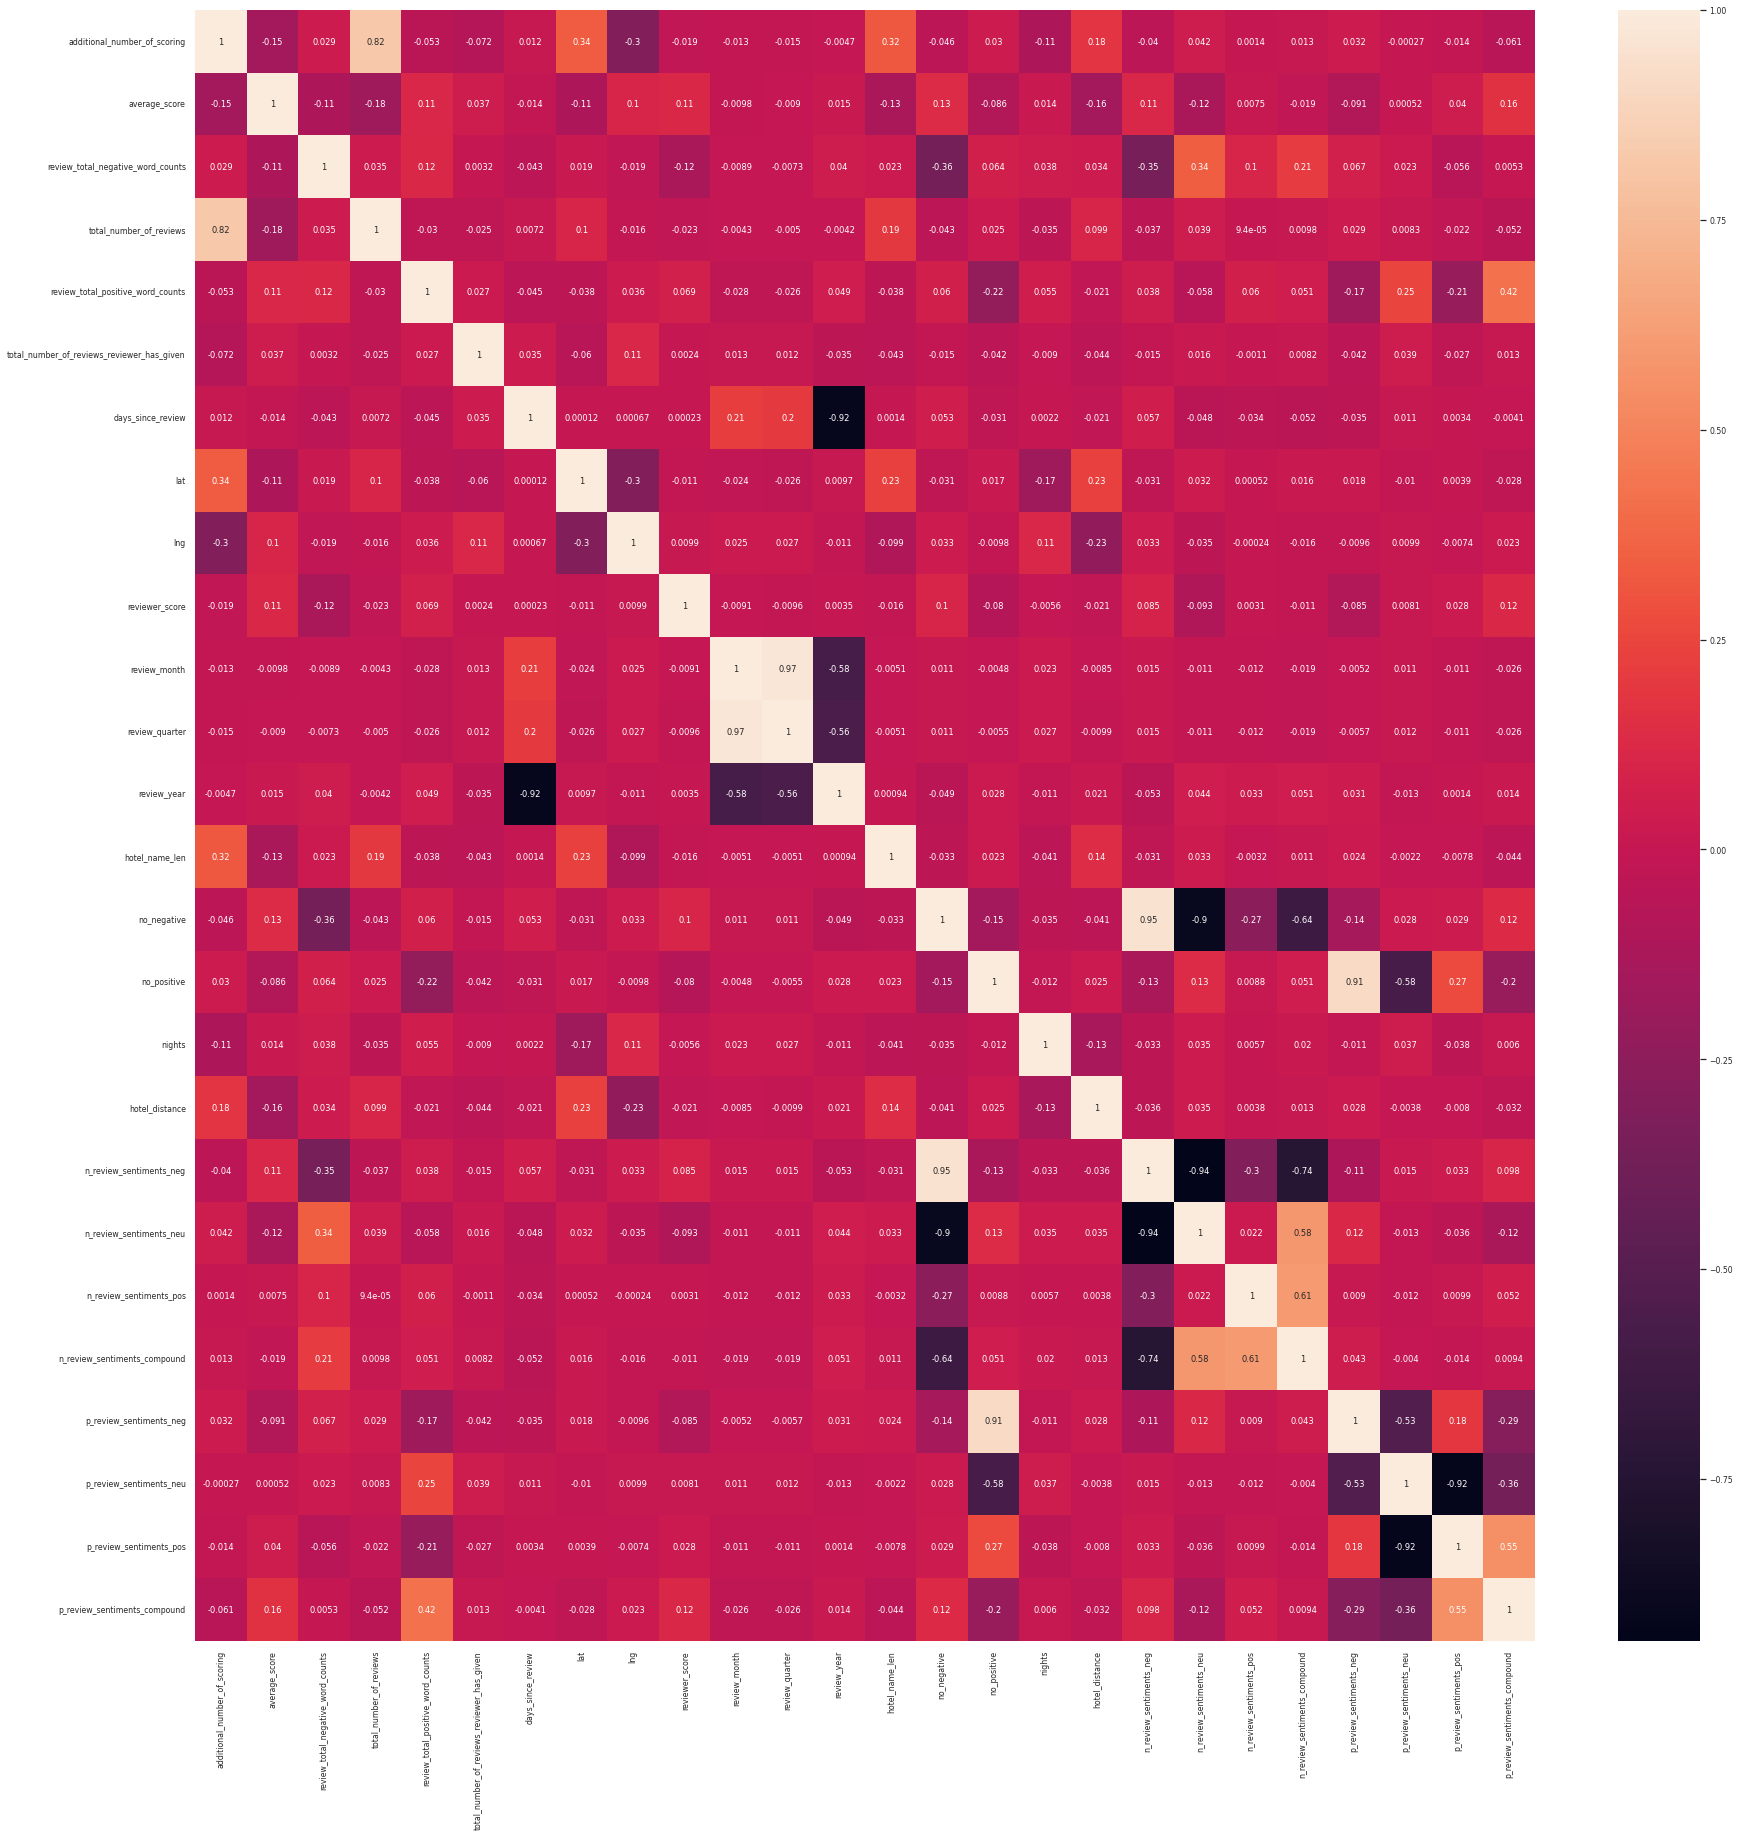

In [345]:
# тепловая карта корреляции признаков
plt.rcParams['figure.figsize'] = (30,30)
sns.heatmap(data.drop(['sample'], axis=1).corr(), annot=True)

In [346]:
data_cod.drop('additional_number_of_scoring', axis = 1, inplace=True)

In [347]:
RANDOM_SEED = 42

In [348]:
# Для начала разделим признаки по типу, перечислим их:

# непрерывные признаки
num_cols = ['average_score', 'review_total_negative_word_counts', 'total_number_of_reviews', 'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given', 'days_since_review', 'lat', 'lng', 'hotel_name_len', 'hotel_distance']

# категориальные признаки
cat_cols = ['reviewer_nationality',  'hotel_country', 'trip_type', 'nights', 'no_positive', 'no_negative', 'review_quarter', 'review_month']

In [349]:
train_data = data_cod.query('sample == 1').drop(['sample'], axis=1)
test_data = data_cod.query('sample == 0').drop(['sample'], axis=1)

In [350]:
# Теперь выделим тестовую часть
y = train_data.reviewer_score.values       
X = train_data.drop(['reviewer_score'], axis=1)

<AxesSubplot:>

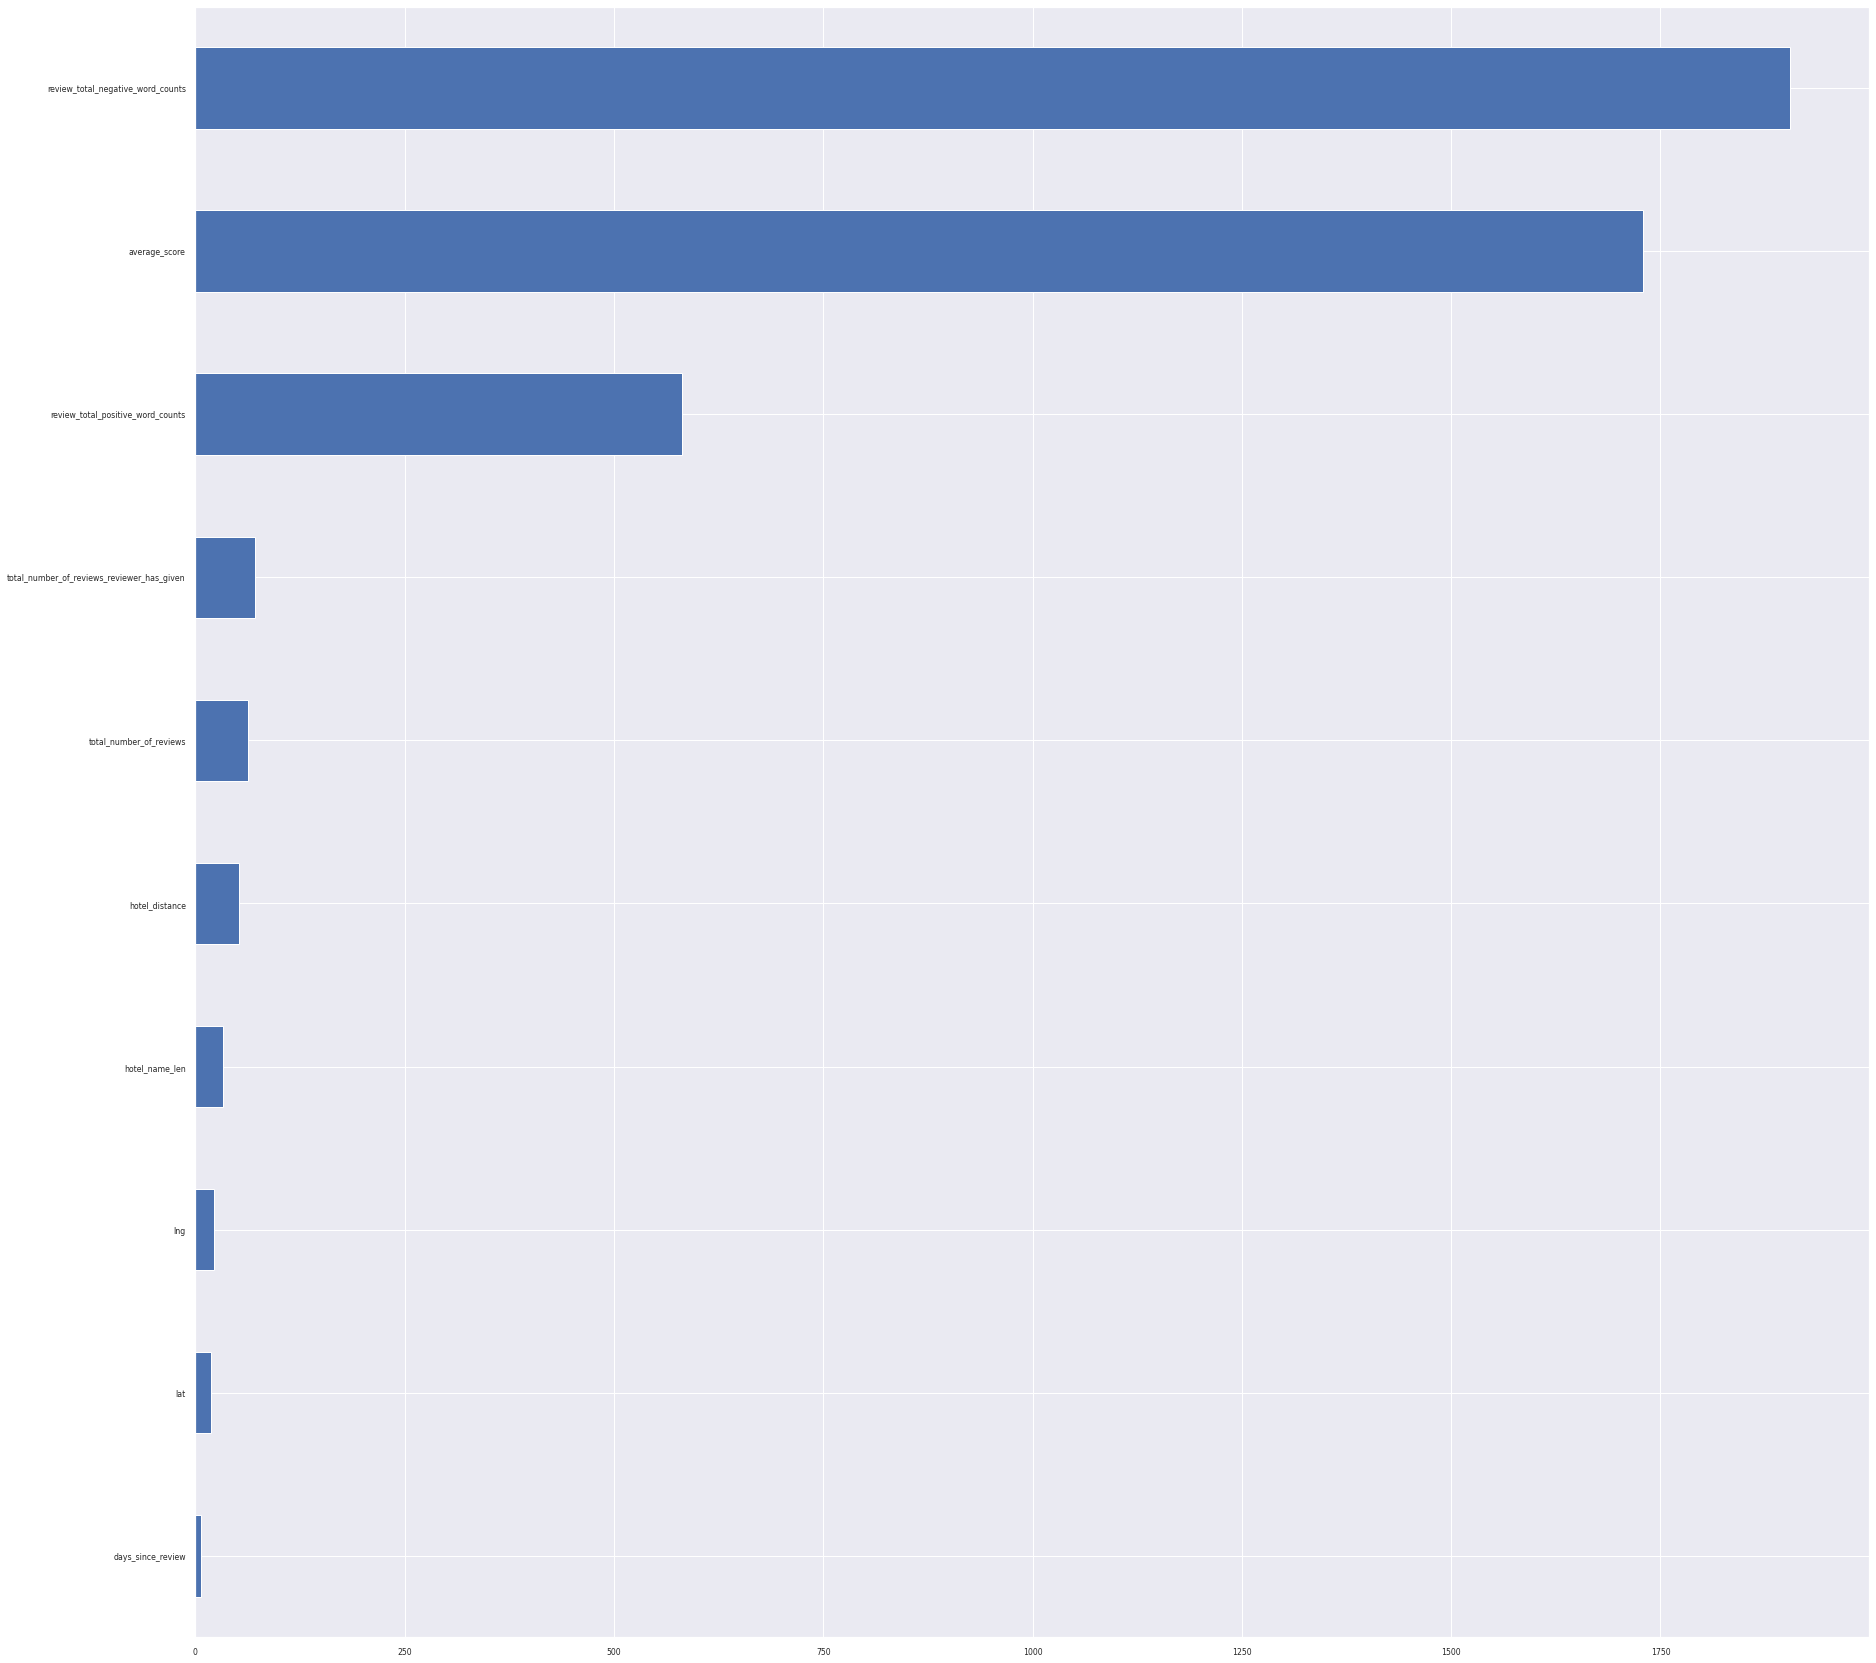

In [351]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

# 7. Обучение модели

In [352]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [353]:

# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 28), (386496, 28), (386496, 27), (309196, 27), (77300, 27))

In [354]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [355]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [356]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.5s finished


In [357]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAPE:', metrics.mean_absolute_error(y_test, y_pred))

MAPE: 0.8757644902975418


<AxesSubplot:>

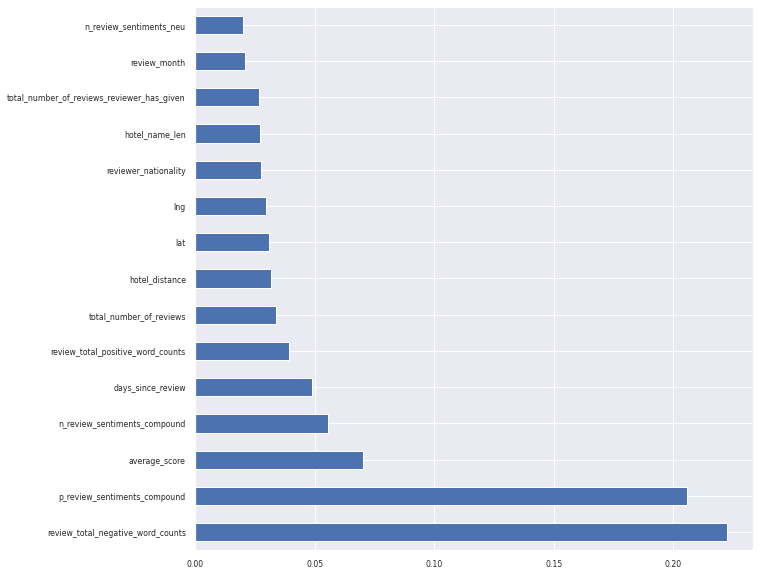

In [358]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [359]:
test_data.sample(10)

,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,lat,lng,reviewer_score,review_month,...,n_review_sentiments_neu,n_review_sentiments_pos,n_review_sentiments_compound,p_review_sentiments_neg,p_review_sentiments_neu,p_review_sentiments_pos,p_review_sentiments_compound,reviewer_nationality,hotel_country,trip_type
51967,8.3,6,3469,4,3,602,51.559095,-0.284704,0.0,12,...,0.624,0.000,-0.3412,0.0,0.385,0.615,0.4939,1,4,1
89710,8.4,14,2726,31,1,487,51.507377,0.038657,0.0,4,...,0.577,0.423,0.7650,0.0,0.693,0.307,0.8779,1,4,2
118844,8.4,20,3224,12,11,361,48.192379,16.399451,0.0,8,...,0.865,0.000,-0.3612,0.0,0.732,0.268,0.5106,35,6,1
68774,8.4,4,1119,4,3,264,45.477617,9.201624,0.0,11,...,1.000,0.000,0.0000,0.0,1.000,0.000,0.0000,21,1,2
110280,8.8,3,4305,34,5,666,51.557696,-0.283526,0.0,10,...,1.000,0.000,0.0000,0.0,0.811,0.189,0.7906,19,4,1
28125,7.5,23,2197,22,2,1,51.491668,-0.194747,0.0,8,...,0.770,0.090,-0.2774,0.0,0.498,0.502,0.9337,1,4,1
99138,8.6,3,2764,3,1,138,48.855566,2.292624,0.0,3,...,0.263,0.737,0.4215,0.0,1.000,0.000,0.0000,4,5,1
32538,8.0,0,768,15,13,171,51.512676,-0.186783,0.0,2,...,0.000,0.000,-0.7096,0.0,1.000,0.000,0.0000,1,4,1
80610,8.2,364,1047,13,13,137,51.494847,-0.118748,0.0,3,...,0.925,0.043,0.3167,0.0,0.374,0.626,0.9245,1,4,1
51022,8.5,0,722,11,7,357,51.521330,-0.291505,0.0,8,...,0.000,0.000,-0.7096,0.0,0.530,0.470,0.7964,1,4,1


In [360]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [361]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [362]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.3s finished


In [363]:
predict_submission

array([8.61 , 7.777, 8.567, ..., 8.383, 9.428, 7.348])

In [364]:
list(sample_submission)

['reviewer_score', 'id']

In [365]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.610,488440
1,7.777,274649
2,8.567,374688
3,9.677,404352
4,9.667,451596
5,8.756,302161
6,7.764,317079
7,8.007,13963
8,8.806,159785
9,7.202,195089
